In [1]:
%matplotlib inline
from glob import glob
import nibabel
from nilearn import plotting
from nilearn.image import mean_img, math_img
import numpy as np
from matplotlib import pyplot as plt
import pickle
from nilearn.input_data import NiftiMasker

/home/parietal/hrichard/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# IBC results

## Method
- Cross validation procedure: 5 different subjects are used as target. The final score is the average score. We do not cross validate on sessions (does not seem to change anything)
- For mapping algorithms: The predicted image for a given subject and session is the average of the prediction using all other subjects and sessions.
- For template algorithms: The predicted image for a given subject is the one obtained from the template.

##Compared algorithms
- Hyperalignment (should be changed to Scaled orthogonal transform): Linear regression wirh orthogonality constrains (mapping algorithm).
- srm_ortho: Shared response model with scaled orthogonal transform (template algorithm)
- ridgeCV: Ridge constrains with automatic setting of parameters (1e3, 1e4, 1e5 are tested) (mapping algorithm)
- mean: Identity regression (mapping algorithm)
- RCV_template: The template is simply the mean, we use ridge regression to go from template to subjects

In [2]:
# Files corresponding to all experiments
sorted(glob("/storage/workspace/hrichard/results/exp13/ibcalign*"))

['/storage/workspace/hrichard/results/exp13/ibcalignment_algohyperalignmentsubject_1runs_1-6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/ibcalignment_algohyperalignmentsubject_3runs_1-6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/ibcalignment_algohyperalignmentsubject_6runs_1-6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/ibcalignment_algohyperalignmentsubject_7runs_1-6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/ibcalignment_algohyperalignmentsubject_8runs_1-6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/ibcalignment_algohyperalignmentsubject_8runs_2-15_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/ibcalignment_algohyperalignmentsubject_8runs_5-13_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/ibcalignment_algomeansubject_1runs_1-6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/ibcalignment_algomeansubject_3runs_1-6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/ibcalignment_algomeansubject_

('hyperalignment', 'number of explained pixels', 3507)
('srm_ortho', 'number of explained pixels', 6807)
('ridgeCV', 'number of explained pixels', 7931)
('mean', 'number of explained pixels', 207)


StopIteration: 

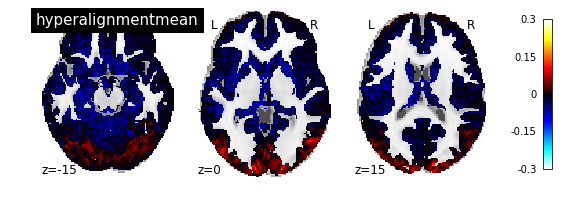

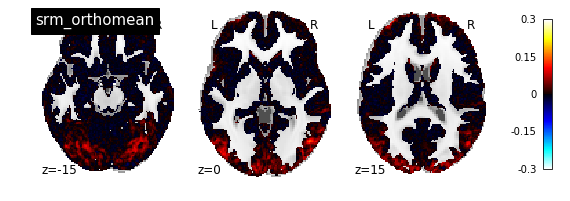

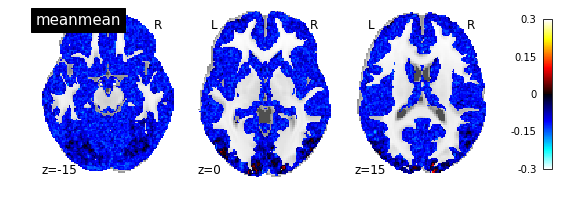

In [3]:
# Results
for algo in ["hyperalignment", "srm_ortho", "ridgeCV", "mean", "RCV_template"]:
    algo_paths = glob("/storage/workspace/hrichard/results/exp13/ibcalign*_algo"+algo+"subject_[13867]runs_1-6*")
    
    m_img = mean_img(algo_paths)
    plotting.plot_stat_map(m_img,
            cut_coords=[-15, 0, 15],
            display_mode="z",
            draw_cross=False,
            vmax=0.3,
            threshold=1e-5,
            title=algo + "mean"
            )
    # Quantitative score
    X = m_img.get_data()
    print(algo, "number of explained pixels", len(X[X>0.05]))

## IBC: average penalization on ridge regression

In [4]:
mask_dir = "/storage/store/data/ibc/derivatives/"
mask_path=mask_dir + "group/gm_mask.nii.gz"
masker = NiftiMasker(
        mask_img=mask_path,
        standardize=True,
        detrend=True,
        low_pass=0.1,
        high_pass=0.01,
        t_r=2,
    ).fit()

imgs = []
for path in glob("/storage/tompouce/hrichard/ibc/ibc_fit/info_ridge*"):
    info = pickle.load(open(path, "rb"))
    img = masker.inverse_transform(info)
    imgs.append(img)

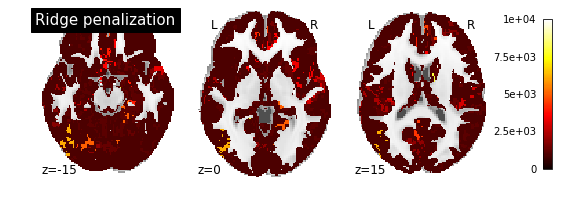

In [5]:
plotting.plot_stat_map(mean_img(imgs),
                cut_coords=[-15, 0, 15],
                display_mode="z",
                draw_cross=False,
                title="Ridge penalization"
                )

# FORREST results

## Method
- Cross validation procedure: 5 different subjects are used as target. The final score is the average score. We do not cross validate on sessions (does not seem to change anything)
- For mapping algorithms: The predicted image for a given subject and session is the average of the prediction using all other subjects and sessions.
- For template algorithms: The predicted image for a given subject is the one obtained from the template.

##Compared algorithms
- Hyperalignment (should be changed to Scaled orthogonal transform): Linear regression wirh orthogonality constrains (mapping algorithm).
- srm_ortho: Shared response model with scaled orthogonal transform (template algorithm)
- ridgeCV: Ridge constrains with automatic setting of parameters (1e3, 1e4, 1e5 are tested) (mapping algorithm)
- mean: Identity regression (mapping algorithm)
- RCV_template: The template is simply the mean, we use ridge regression to go from template to subjects

In [10]:
sorted(glob("/storage/workspace/hrichard/results/exp13/forrestalign*"))

['/storage/workspace/hrichard/results/exp13/forrestalignment_algohyperalignmentsubject_13runs_6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/forrestalignment_algohyperalignmentsubject_16runs_6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/forrestalignment_algohyperalignmentsubject_4runs_6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/forrestalignment_algohyperalignmentsubject_7runs_6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/forrestalignment_algomeansubject_13runs_6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/forrestalignment_algomeansubject_16runs_6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/forrestalignment_algomeansubject_4runs_6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/forrestalignment_algomeansubject_7runs_6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/forrestalignment_algoridgeCVsubject_13runs_6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/forrestalignment_algoridgeCVsubject

('hyperalignment', memmap(0.0026865771505981684, dtype=float32))
('srm_ortho', memmap(0.003275405240076359))
('ridgeCV', memmap(0.0008477789233438671, dtype=float32))
('mean', memmap(-0.022564785555005074, dtype=float32))


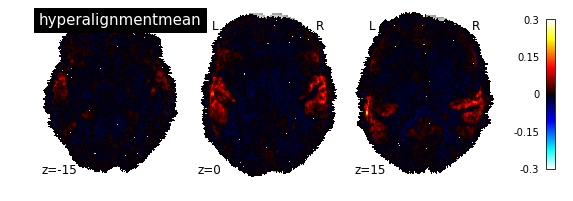

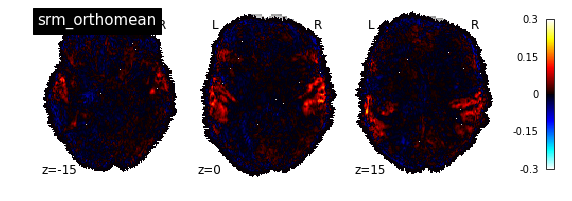

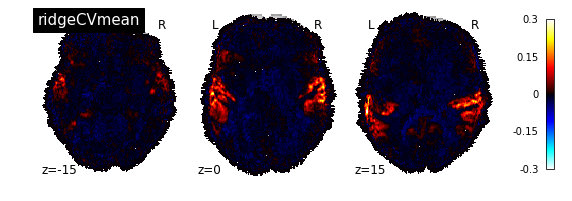

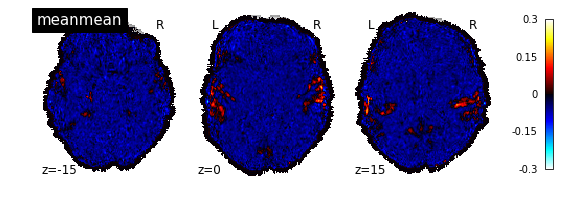

In [8]:
for algo in ["hyperalignment", "srm_ortho", "ridgeCV", "mean", "RCV_template"]:
    algo_paths = glob("/storage/workspace/hrichard/results/exp13/forrestalign*_algo"+algo+"subject_[147][r63]*uns_[6]*")
    if len(algo_paths) != 0:
        m_img = mean_img(algo_paths)
        plotting.plot_stat_map(m_img,
                cut_coords=[-15, 0, 15],
                display_mode="z",
                draw_cross=False,
                vmax=0.3,
                threshold=1e-5,
                title=algo + "mean"
                )
        print(algo, m_img.get_data().mean())

# FUZZY IBC results
smoothing_fwhm=5 

## Method
- Cross validation procedure: 5 different subjects are used as target. The final score is the average score. We do not cross validate on sessions (does not seem to change anything)
- For mapping algorithms: The predicted image for a given subject and session is the average of the prediction using all other subjects and sessions.
- For template algorithms: The predicted image for a given subject is the one obtained from the template.

##Compared algorithms
- Hyperalignment (should be changed to Scaled orthogonal transform): Linear regression wirh orthogonality constrains (mapping algorithm).
- srm_ortho: Shared response model with scaled orthogonal transform (template algorithm)
- ridgeCV: Ridge constrains with automatic setting of parameters (1e3, 1e4, 1e5 are tested) (mapping algorithm)
- mean: Identity regression (mapping algorithm)
- RCV_template: The template is simply the mean, we use ridge regression to go from template to subjects

In [11]:
sorted(glob("/storage/workspace/hrichard/results/exp13/fuzzy_ibcalign*"))

['/storage/workspace/hrichard/results/exp13/fuzzy_ibcalignment_algosrm_orthosubject_8runs_1-6_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/fuzzy_ibcalignment_algosrm_orthosubject_8runs_2-15_exp13.nii',
 '/storage/workspace/hrichard/results/exp13/fuzzy_ibcalignment_algosrm_orthosubject_8runs_5-13_exp13.nii']

In [21]:
for algo in ["hyperalignment", "srm_ortho", "ridgeCV", "mean", "RCV_template"]:
    algo_paths = glob("/storage/workspace/hrichard/results/exp13/fuzzy_ibcalign*_algo"+algo+"subject_[8]runs_*")
    
    if len(algo_paths) != 0:
        m_img = mean_img(algo_paths)
        plotting.plot_stat_map(m_img,
                cut_coords=[-15, 0, 15],
                display_mode="z",
                draw_cross=False,
                vmax=0.3,
                threshold=1e-5,
                title=algo
                )